In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ***Machine Learning Section for MMC***

#### ***a. Libraries***

In [ ]:
import pandas as pd
import numpy as np
from numpy import mean,std
import seaborn as sn
import matplotlib.pyplot as plt

#Pre processing and scoring library
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import KFold,train_test_split,cross_val_score,StratifiedKFold,RepeatedKFold,GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score, roc_curve,auc

#Model Selection Library
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier


#### ***b. Preprocessing***

In [ ]:
df = pd.read_csv('VOR Train Test.csv')
df = df.drop('ORDER',axis=1)

Features = df.iloc [:,0:-1].values      # Feature Matrix / Independent Variables
Targets, Values = pd.factorize(df["FAULTY PARTS"])      # Target Matrix / Dependent Variable

Targets_unique = np.unique(Targets)
Values_unique = Values
print("Number of orders used is :", Features.shape[0])

# Print Legend of Targets
print('Legend: ')
for Targets_unique,Values_unique in enumerate(Values_unique):
    print (Targets_unique,"=",Values_unique)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features,Targets,test_size = 0.3,random_state=42, stratify=Targets)

Number of orders used is : 36
Legend: 
0 = 600-A16097-020
1 = PCBASSY 701-0954-02
2 = SWITCH 512-0150
3 = DISPLAY 700C46204A
4 = GASKET LIGHT SEAL 600-B46814
5 = PCBASSY 701-0685-03
6 = PCBASSY 701-0953-02
7 = PCBASSY 701-0946-12


#### ***c. Load Model with Tuned Parameters***

Best parameters for each model that have been searched from **section e** is used here to generate classification model.

In [ ]:
# Using each params variable that get from each hyperparameter tuning

# Random Forest
rf = RandomForestClassifier(max_depth=100, max_features='log2', n_estimators=90)

# Gradient Boosting
gb = GradientBoostingClassifier(max_depth=5, max_features='sqrt', n_estimators=50)

# Decision Tree
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',max_leaf_nodes=28)

# Naive Bayes
nb = GaussianNB(var_smoothing=0.1873817422860384)

# K-Nearest Neighbour
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

# Support Vector Machine
svc = OneVsRestClassifier(estimator=SVC(C=10, gamma=1, probability=True))

# Logistic Regression
lr = OneVsRestClassifier(estimator=LogisticRegression(C=100, max_iter=3000,solver='newton-cg'))

# Multilayer Perceptron
mlp = MLPClassifier(max_iter=5000)

In [ ]:
# Fit the model with training set
lr.fit(X_train, y_train)
gb.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svc.fit(X_train, y_train)
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=5000)

#### ***d. Model Evaluation***

##### ***Each Model Prediction Test Result***




###### ***Test Result Function***

In [ ]:
def conf_matrix(model,model_name):
    
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 1)
    print("Accuracy of %s "%model_name + "model for validation data set is {:.1f}%".format(accuracy))
    print("With confusion matrix for validation data set is shown below:")
    
 
    ytest_un = np.unique(y_test)
    ypred_un = np.unique(y_pred)
    combined = [*ytest_un, *ypred_un]
    combined_un = np.unique(combined)

    Values_cm = Values

    df_cm = pd.DataFrame(cm, index = [i for i in combined_un],
                      columns = [i for i in combined_un])
    
    # Ploting
    plt.figure(figsize = (5,3))
    ax = plt.axes()
    sn.heatmap(df_cm, annot=True,cmap="Blues")
    ax.set_title('Confusion Matrix of %s Model'%model_name)
    plt.show()

    print ("Where: ")

    for combined_un,Values_cm in enumerate(Values_cm):
      print (combined_un,"=",Values_cm)

###### ***Random Forest Result***

Accuracy of Random Forest model for validation data set is 90.9%
With confusion matrix for validation data set is shown below:


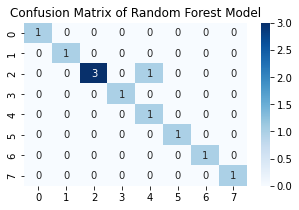

Where: 
0 = 600-A16097-020
1 = PCBASSY 701-0954-02
2 = SWITCH 512-0150
3 = DISPLAY 700C46204A
4 = GASKET LIGHT SEAL 600-B46814
5 = PCBASSY 701-0685-03
6 = PCBASSY 701-0953-02
7 = PCBASSY 701-0946-12


In [ ]:
model = rf
model_name = "Random Forest"
conf_matrix(model, model_name)


###### ***Gradient Boosting Result***

Accuracy of Gradient Boosting model for validation data set is 90.9%
With confusion matrix for validation data set is shown below:


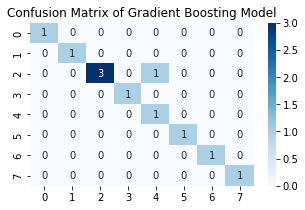

Where: 
0 = 600-A16097-020
1 = PCBASSY 701-0954-02
2 = SWITCH 512-0150
3 = DISPLAY 700C46204A
4 = GASKET LIGHT SEAL 600-B46814
5 = PCBASSY 701-0685-03
6 = PCBASSY 701-0953-02
7 = PCBASSY 701-0946-12


In [ ]:
model = gb
model_name = "Gradient Boosting"
conf_matrix(model, model_name)

###### ***Gaussian Naive Bayes Result***

Accuracy of Gaussian Naive Bayes model for validation data set is 81.8%
With confusion matrix for validation data set is shown below:


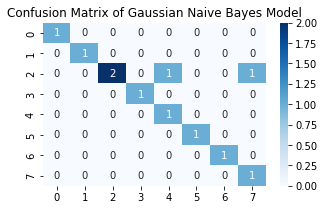

Where: 
0 = 600-A16097-020
1 = PCBASSY 701-0954-02
2 = SWITCH 512-0150
3 = DISPLAY 700C46204A
4 = GASKET LIGHT SEAL 600-B46814
5 = PCBASSY 701-0685-03
6 = PCBASSY 701-0953-02
7 = PCBASSY 701-0946-12


In [ ]:
model = nb
model_name = "Gaussian Naive Bayes"
conf_matrix(model, model_name)

###### ***Decision Tree Result***

Accuracy of Decision Tree model for validation data set is 72.7%
With confusion matrix for validation data set is shown below:


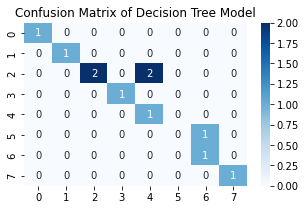

Where: 
0 = 600-A16097-020
1 = PCBASSY 701-0954-02
2 = SWITCH 512-0150
3 = DISPLAY 700C46204A
4 = GASKET LIGHT SEAL 600-B46814
5 = PCBASSY 701-0685-03
6 = PCBASSY 701-0953-02
7 = PCBASSY 701-0946-12


In [ ]:
model = dt
model_name = "Decision Tree"
conf_matrix(model, model_name)

###### ***K-Nearest Neighbors Result***

Accuracy of KNN model for validation data set is 90.9%
With confusion matrix for validation data set is shown below:


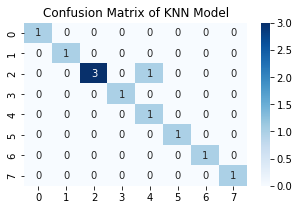

Where: 
0 = 600-A16097-020
1 = PCBASSY 701-0954-02
2 = SWITCH 512-0150
3 = DISPLAY 700C46204A
4 = GASKET LIGHT SEAL 600-B46814
5 = PCBASSY 701-0685-03
6 = PCBASSY 701-0953-02
7 = PCBASSY 701-0946-12


In [ ]:
model = knn
model_name = "KNN"
conf_matrix(model, model_name)

###### ***Support Vector Machine Result***

Accuracy of Support Vector Machine model for validation data set is 90.9%
With confusion matrix for validation data set is shown below:


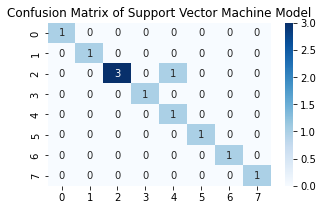

Where: 
0 = 600-A16097-020
1 = PCBASSY 701-0954-02
2 = SWITCH 512-0150
3 = DISPLAY 700C46204A
4 = GASKET LIGHT SEAL 600-B46814
5 = PCBASSY 701-0685-03
6 = PCBASSY 701-0953-02
7 = PCBASSY 701-0946-12


In [ ]:
model = svc
model_name = "Support Vector Machine"
conf_matrix(model, model_name)

###### ***Logistic Regression Result***

Accuracy of Logistic Regression model for validation data set is 90.9%
With confusion matrix for validation data set is shown below:


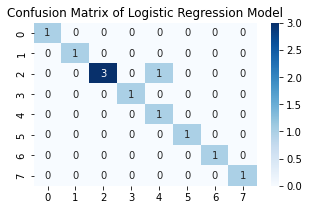

Where: 
0 = 600-A16097-020
1 = PCBASSY 701-0954-02
2 = SWITCH 512-0150
3 = DISPLAY 700C46204A
4 = GASKET LIGHT SEAL 600-B46814
5 = PCBASSY 701-0685-03
6 = PCBASSY 701-0953-02
7 = PCBASSY 701-0946-12


In [ ]:
model = lr
model_name = "Logistic Regression"
conf_matrix(model, model_name)

###### ***MultiLayer Perceptron Result***

Accuracy of MultiLayer Perceptron model for validation data set is 90.9%
With confusion matrix for validation data set is shown below:


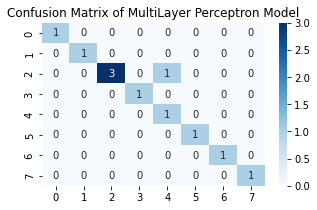

Where: 
0 = 600-A16097-020
1 = PCBASSY 701-0954-02
2 = SWITCH 512-0150
3 = DISPLAY 700C46204A
4 = GASKET LIGHT SEAL 600-B46814
5 = PCBASSY 701-0685-03
6 = PCBASSY 701-0953-02
7 = PCBASSY 701-0946-12


In [ ]:
model = mlp
model_name = "MultiLayer Perceptron"
conf_matrix(model, model_name)

#### ***e. Hyperparameter Tuning with Unbiased Accuracy***

##### ***Hyperparameter Summary***

It is obtained from another python file named "Nested CV MMC"

***Summary:***


*   ***Random Forest Best Parameter:*** 
RandomForestClassifier(max_depth=100, max_features='log2', n_estimators=90)

*   ***Gradient Boosting Best Parameter:*** 
GradientBoostingClassifier(max_depth=5, max_features='sqrt', n_estimators=50)

*  ***Gaussian Naive Bayes Best Parameter:*** 
GaussianNB(var_smoothing=0.1873817422860384)

*  ***Decision Tree Best Parameter:*** DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features='auto',max_leaf_nodes=28)

*  ***KNN Best Parameter:*** KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

*   ***SVM Best Parameter:***
OneVsRestClassifier(estimator=SVC(C=10, gamma=1, probability=True))

*   ***Logistic Regression Best Parameter:*** 
neVsRestClassifier(estimator=LogisticRegression(C=100, max_iter=3000, solver='newton-cg'))

*   ***Multilayer Perceptron Best Parameter:*** 
MLPClassifier(max_iter=5000)






##### ***Unbiased Accuracy Summary***



*   **Random Forest** Unbiased Accuracy : 69.3% ± 1.4%
*   **Gradient Boosting** Unbiased Accuracy : 67.3% ± 0.9%

*   **Gaussian Naive Bayes** Unbiased Accuracy : 73.4% ± 1.6%

*   **Decision Tree** Unbiased Accuracy : 52.2% ± 1.6%

*   **K-Nearest Neighbors** Unbiased Accuracy : 64.6% ± 1.6%

*   **Support Vector Machine** Unbiased Accuracy : 70.9% ± 1.3%

*   **Logistic Regression** Unbiased Accuracy : 69.3% ± 1.5%

*   **Multilayer Perceptron** Unbiased Accuracy : 68.7% ± 1.0%



#### ***f. Save 3 Best Model as .pkl Extension***

By looking at each unbiased accuracy score that have been calculated above, 3 models with highest score will be choose to be save as .pkl extension, to be model prediction that will shown in WebPage 

Best 3 Model are: 

*   Gaussian Naive Bayes Model
*   Support Vector Machine
*   Logistic Regression


In [ ]:
# Write down variable name that give best unbiased accuracy (Open Section C. to know variable name)
var_name_1 = nb
var_name_2 = svc
var_name_3 = lr


# Write down the name of pickle file that will be used for each model 
pkl_name_1 = "modelnb_mmr.pkl"
pkl_name_2 = "modelsvc_mmr.pkl"
pkl_name_3 = "modellr_mmr.pkl"


# Convert the variable name and pickle file name to dictionary
dict = {'Variable Name 1': var_name_1, 'pkl file name 1': pkl_name_1,
        'Variable Name 2': var_name_2, 'pkl file name 2': pkl_name_2,
        'Variable Name 3': var_name_3, 'pkl file name 3': pkl_name_3
        }

# Downloading 4 Best Model to Local Files

import pickle
pickle.dump(dict['Variable Name 1'], open(dict['pkl file name 1'],"wb"))
pickle.dump(dict['Variable Name 2'], open(dict['pkl file name 2'],"wb"))
pickle.dump(dict['Variable Name 3'], open(dict['pkl file name 3'],"wb"))


from google.colab import files
files.download(dict['pkl file name 1'])
files.download(dict['pkl file name 2'])
files.download(dict['pkl file name 3'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>